In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [27]:
def linearFit(h, m, b): 
    return m*h + b

In [28]:
data = np.genfromtxt('heightData.txt', skip_header=1)


In [29]:
data[ : ]

array([[  0.4,   7. ],
       [  0.8,  17. ],
       [  1.4,  25. ],
       [  2. ,  38. ],
       [  2.6,  45. ],
       [  3.4,  62. ],
       [  3.8,  72. ]])

In [30]:
x = data[ : ,0]
y = data[ : ,1]

In [31]:
fitParams, fitCovariances = curve_fit(linearFit, x, y)
print(fitParams)
print(fitCovariances)

[ 18.34872997   0.25404108]
[[ 0.40154371 -0.8260327 ]
 [-0.8260327   2.26700031]]


In [32]:
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

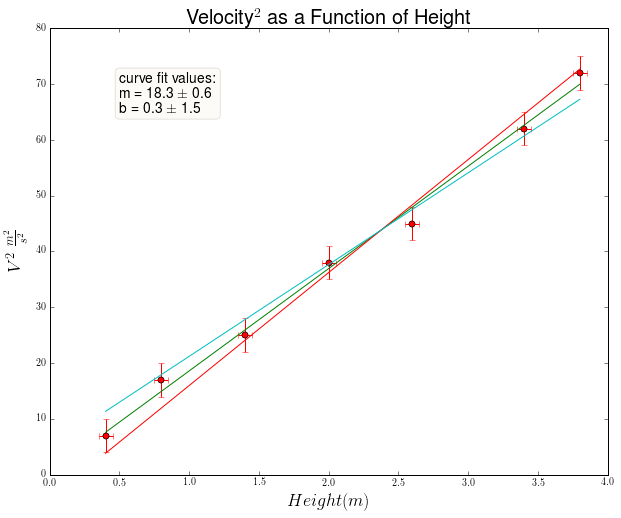

In [35]:
plt.plot (x,y,'o')
plt.xlabel (r'$Height (m)$', fontsize = 18)
plt.ylabel (r'$V^2 \; \frac{m^2}{s^2}$', fontsize = 18)
plt.title (r'Velocity$^2$ as a Function of Height', fontsize = 20)
plt.errorbar(x, y, fmt = 'ro', yerr = 3, xerr = 0.05)
plt.plot(x, linearFit(x, fitParams[0], fitParams[1]),\
         x, linearFit(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1]),\
         x, linearFit(x, fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1])\
         )

props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)

plt.text(0.5, 65.0, 
    ("curve fit values:\n m = %.1f\t $\pm$ %.1f\n b = %.1f\t $\pm$ %.1f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )
plt.savefig('a1plot.png', bbox_inches=0, dpi=600)
plt.show ()